## Importing Required Libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Loading the Datasets



In [ ]:
df = pd.read_csv("/content/MSFT.csv")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400
...,...,...,...,...,...,...,...
8501,2019-12-03,147.490005,149.429993,146.649994,149.309998,149.309998,24066000
8502,2019-12-04,150.139999,150.179993,149.199997,149.850006,149.850006,17574700
8503,2019-12-05,150.050003,150.320007,149.479996,149.929993,149.929993,17869100
8504,2019-12-06,150.990005,151.869995,150.270004,151.750000,151.750000,16403500


## Understanding the datasets

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8506.000000,8506.000000,8506.000000,8506.000000,8506.000000,8.506000e+03
mean,27.934640,28.227380,27.634298,27.938141,23.120858,6.054342e+07
std,28.012525,28.233353,27.754213,28.009016,27.516096,3.891047e+07
min,0.088542,0.092014,0.088542,0.090278,0.058081,2.304000e+06
25%,3.369141,3.414063,3.343750,3.392578,2.182640,3.673815e+07
50%,26.155000,26.490000,25.860001,26.147500,18.408634,5.378325e+07
75%,34.092813,34.568125,33.654688,34.083750,25.319625,7.422125e+07
max,152.330002,152.500000,151.520004,152.320007,152.320007,1.031789e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8506 entries, 0 to 8505
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8506 non-null   object 
 1   Open       8506 non-null   float64
 2   High       8506 non-null   float64
 3   Low        8506 non-null   float64
 4   Close      8506 non-null   float64
 5   Adj Close  8506 non-null   float64
 6   Volume     8506 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 465.3+ KB


### Data Cleaning

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Visualizing the dataset

In [ ]:
num_cols = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
target = 'Close'

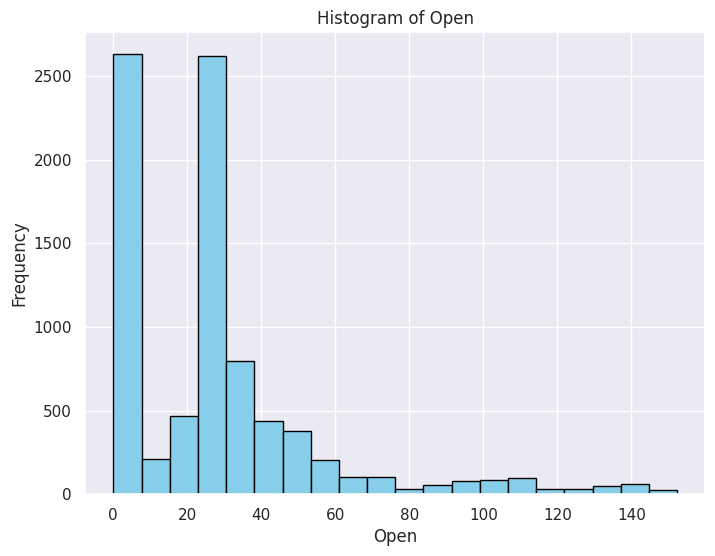

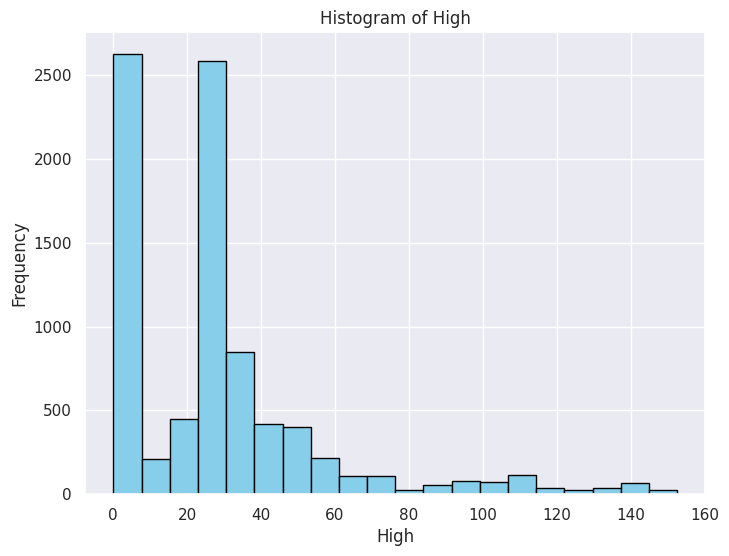

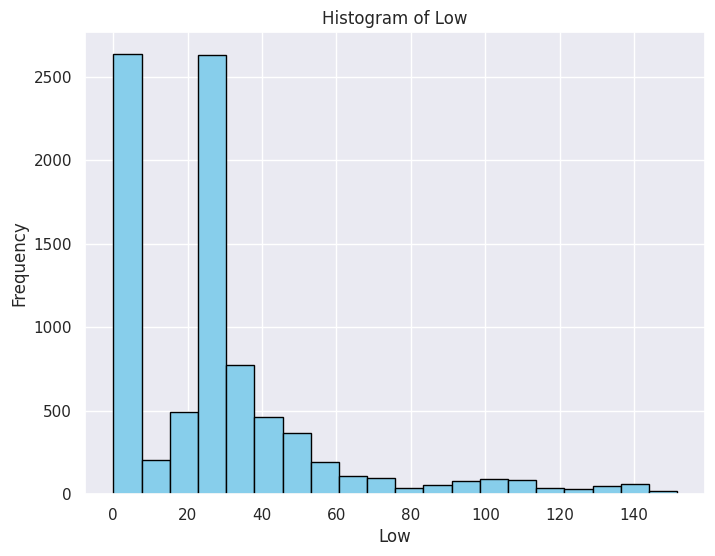

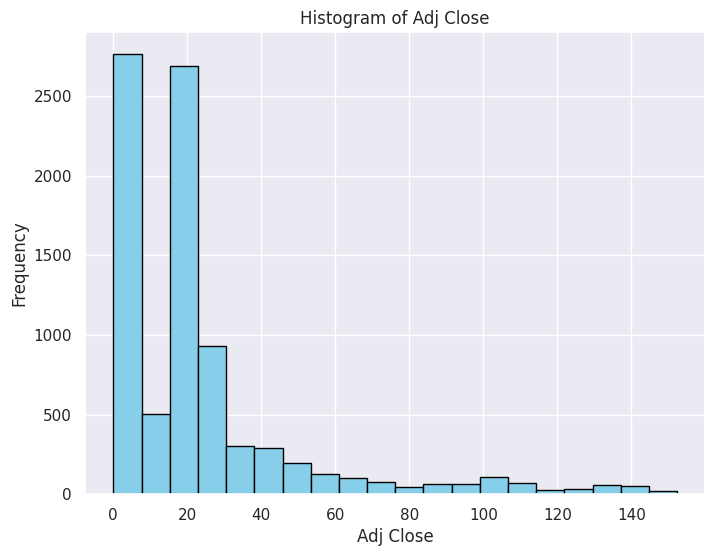

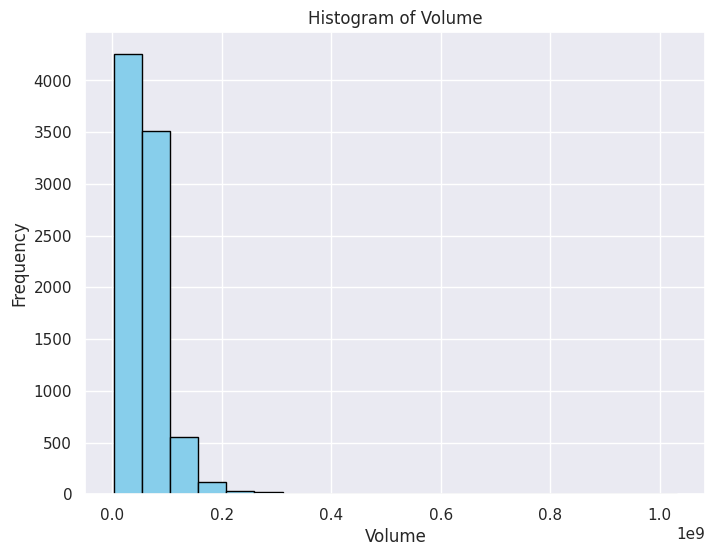

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

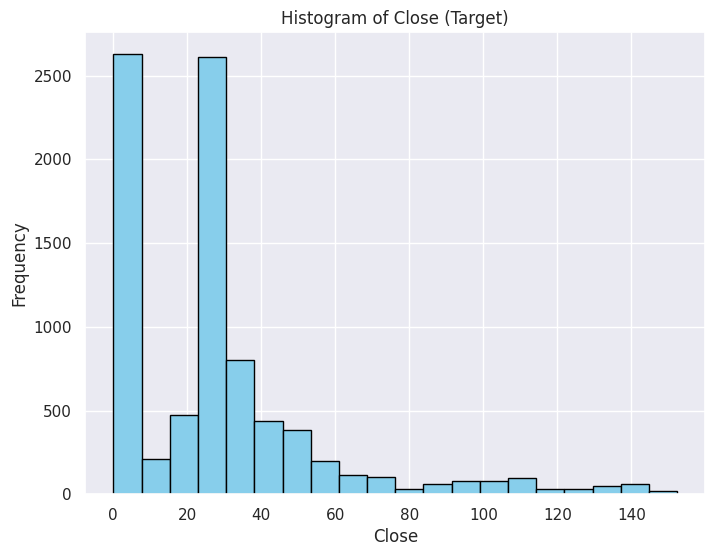

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Close'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Close (Target)')
plt.xlabel('Close')
plt.ylabel('Frequency')
plt.show()

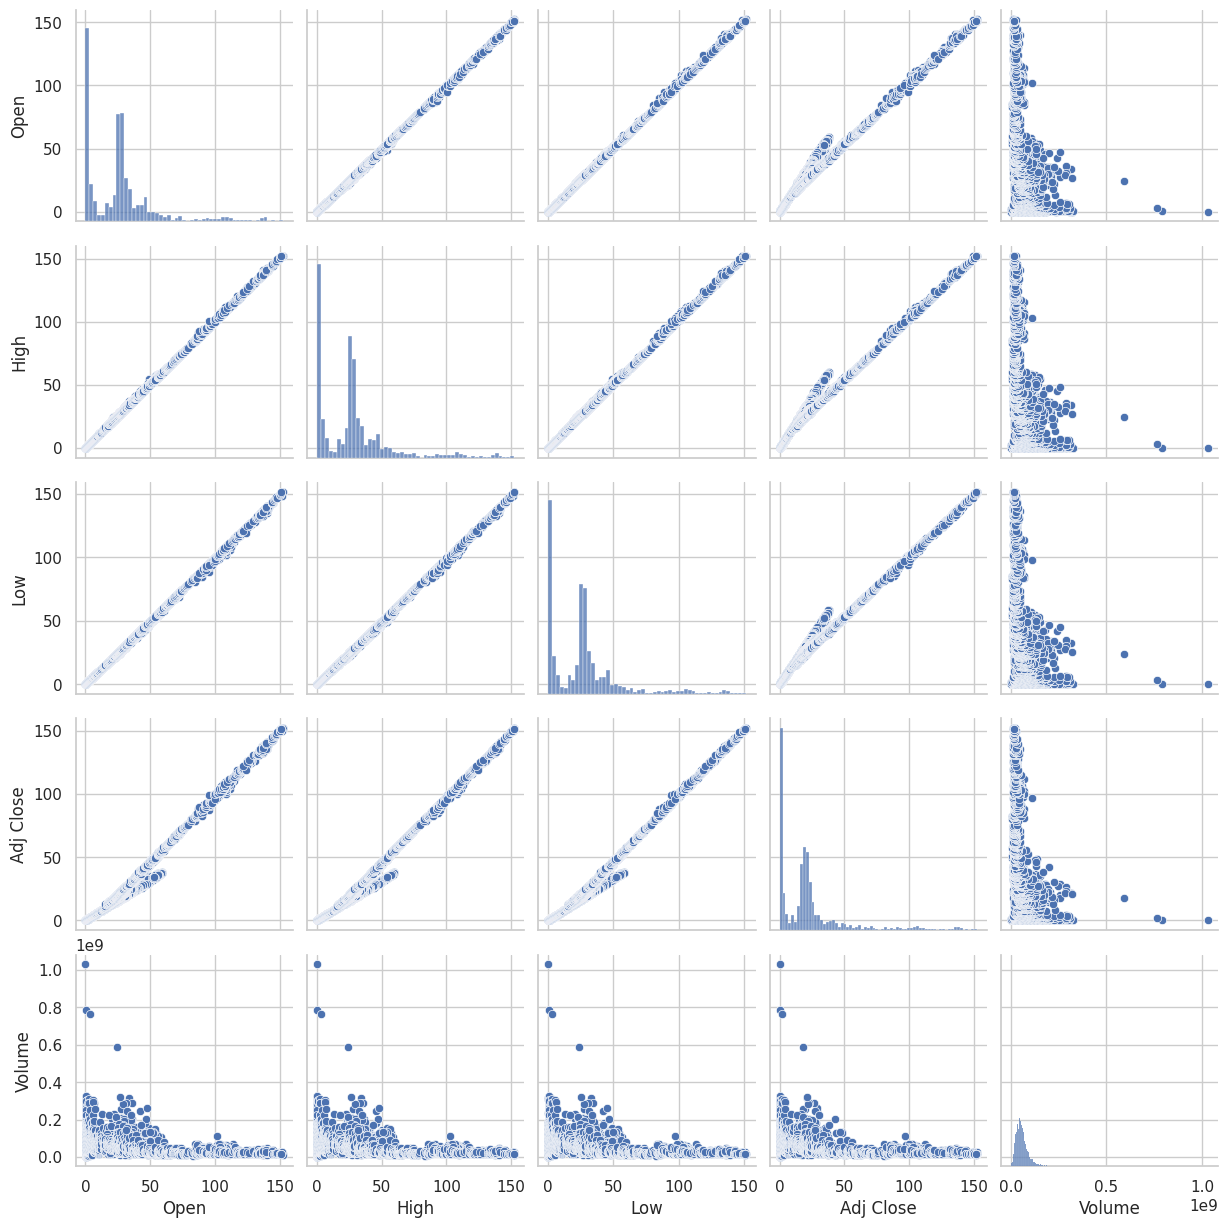

In [ ]:
sns.set(style="whitegrid")
sns.pairplot(df[num_cols])
plt.show()

## Feature Engineering

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

num_cols = [col for col in df.columns if col != 'Date']
imputer.fit(df[num_cols])

df_imputed = imputer.transform(df[num_cols])

df[num_cols] = df_imputed

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
df.drop(columns=['Date'], inplace=True)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,0.088542,0.101563,0.088542,0.097222,0.062549,1.031789e+09,1986,3,13
1,0.097222,0.102431,0.097222,0.100694,0.064783,3.081600e+08,1986,3,14
2,0.100694,0.103299,0.100694,0.102431,0.065899,1.331712e+08,1986,3,17
3,0.102431,0.103299,0.098958,0.099826,0.064224,6.776640e+07,1986,3,18
4,0.099826,0.100694,0.097222,0.098090,0.063107,4.789440e+07,1986,3,19
...,...,...,...,...,...,...,...,...,...
8501,147.490005,149.429993,146.649994,149.309998,149.309998,2.406600e+07,2019,12,3
8502,150.139999,150.179993,149.199997,149.850006,149.850006,1.757470e+07,2019,12,4
8503,150.050003,150.320007,149.479996,149.929993,149.929993,1.786910e+07,2019,12,5
8504,150.990005,151.869995,150.270004,151.750000,151.750000,1.640350e+07,2019,12,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8506 entries, 0 to 8505
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8506 non-null   float64
 1   High       8506 non-null   float64
 2   Low        8506 non-null   float64
 3   Close      8506 non-null   float64
 4   Adj Close  8506 non-null   float64
 5   Volume     8506 non-null   float64
 6   Year       8506 non-null   int64  
 7   Month      8506 non-null   int64  
 8   Day        8506 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 598.2 KB


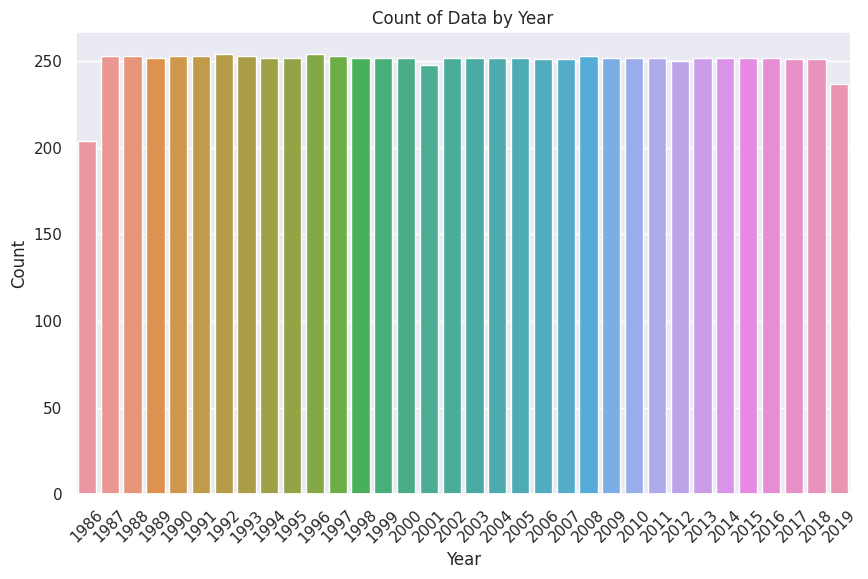

In [ ]:
df['Year'] = df['Year'].astype(str)

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year', order=sorted(df['Year'].unique()))
plt.title('Count of Data by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Year'] = label_encoder.fit_transform(df['Year'])

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,0.088542,0.101563,0.088542,0.097222,0.062549,1.031789e+09,0,3,13
1,0.097222,0.102431,0.097222,0.100694,0.064783,3.081600e+08,0,3,14
2,0.100694,0.103299,0.100694,0.102431,0.065899,1.331712e+08,0,3,17
3,0.102431,0.103299,0.098958,0.099826,0.064224,6.776640e+07,0,3,18
4,0.099826,0.100694,0.097222,0.098090,0.063107,4.789440e+07,0,3,19
...,...,...,...,...,...,...,...,...,...
8501,147.490005,149.429993,146.649994,149.309998,149.309998,2.406600e+07,33,12,3
8502,150.139999,150.179993,149.199997,149.850006,149.850006,1.757470e+07,33,12,4
8503,150.050003,150.320007,149.479996,149.929993,149.929993,1.786910e+07,33,12,5
8504,150.990005,151.869995,150.270004,151.750000,151.750000,1.640350e+07,33,12,6


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

columns_to_scale = [col for col in df.columns if col != 'Close']

scaler = MinMaxScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

std_scaler = StandardScaler()

df[columns_to_scale] = std_scaler.fit_transform(df[columns_to_scale])

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,-0.994117,-0.996250,-0.992548,0.097222,-0.838043,24.962499,-1.697691,-1.041275,-0.312893
1,-0.993807,-0.996219,-0.992235,0.100694,-0.837962,6.364127,-1.697691,-1.041275,-0.198574
2,-0.993683,-0.996188,-0.992110,0.102431,-0.837921,1.866646,-1.697691,-1.041275,0.144384
3,-0.993621,-0.996188,-0.992172,0.099826,-0.837982,0.185642,-1.697691,-1.041275,0.258703
4,-0.993714,-0.996281,-0.992235,0.098090,-0.838022,-0.325099,-1.697691,-1.041275,0.373023
...,...,...,...,...,...,...,...,...,...
8501,4.268176,4.293140,4.288455,149.309998,4.586281,-0.937526,1.688138,1.594065,-1.456085
8502,4.362782,4.319706,4.380338,149.850006,4.605908,-1.104362,1.688138,1.594065,-1.341766
8503,4.359569,4.324665,4.390427,149.929993,4.608815,-1.096796,1.688138,1.594065,-1.227447
8504,4.393128,4.379568,4.418894,151.750000,4.674962,-1.134464,1.688138,1.594065,-1.113128


## Model Building

In [ ]:
X = df.drop(columns=['Close'])
y = df['Close']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Random Forest", RandomForestRegressor(n_estimators=100)),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("Neural Network", MLPRegressor(max_iter=1000)),
    ("SVM", SVR()),
    ("K-Nearest Neighbors", KNeighborsRegressor()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("AdaBoost", AdaBoostRegressor()),
    ("Lasso Regression", Lasso()),
    ("Ridge Regression", Ridge()),
    ("Elastic Net", ElasticNet()),
    ("Gaussian Process", GaussianProcessRegressor(kernel=DotProduct() + WhiteKernel())),
    ("XGBoost", XGBRegressor()),
    ("LightGBM", LGBMRegressor()),
]

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=4, shuffle=True, random_state=1)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: MSE - {cv_results.mean()}, R-squared - {r2_score(y_train, model.fit(X_train, y_train).predict(X_train))}")

Linear Regression: MSE - -0.05547856480490911, R-squared - 0.9999288954645413
Random Forest: MSE - -0.0567023796139294, R-squared - 0.9999911939611406
Gradient Boosting: MSE - -0.1278835467790658, R-squared - 0.9999057434747887
Neural Network: MSE - -0.10740012069384576, R-squared - 0.9999264032830776
SVM: MSE - -19.59517265621831, R-squared - 0.9850843268235271
K-Nearest Neighbors: MSE - -2.3831407629197514, R-squared - 0.9984000605571224
Decision Tree: MSE - -0.09920592226562677, R-squared - 1.0
AdaBoost: MSE - -5.379455291444824, R-squared - 0.9949483894175385


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.906e+02, tolerance: 3.398e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.449e+02, tolerance: 3.601e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.263e+02, tolerance: 3.394e

Lasso Regression: MSE - -1.2480373139153949, R-squared - 0.9983977556405561
Ridge Regression: MSE - -0.0984100098608015, R-squared - 0.9998822413435177
Elastic Net: MSE - -14.427991653202092, R-squared - 0.9814667922650728
Gaussian Process: MSE - -0.09844619090936883, R-squared - 0.9998822184781553
XGBoost: MSE - -0.19017950038747086, R-squared - 0.9999714144259206
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1355
[LightGBM] [Info] Number of data points in the train set: 4465, number of used features: 8
[LightGBM] [Info] Start training from score 27.894900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overh

In [ ]:
best_model = None
best_mse = float('inf')

for name, model, cv_results in zip(names, models, results):
    avg_mse = -cv_results.mean()
    if avg_mse < best_mse:
        best_mse = avg_mse
        best_model = (name, model)

print(f"The best model is: {best_model[0]} with MSE: {best_mse}")


The best model is: Linear Regression with MSE: 0.05547856480490911


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.936e+02, tolerance: 4.610e+02
  model = cd_fast.enet_coordinate_descent(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000661 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1355
[LightGBM] [Info] Number of data points in the train set: 5954, number of used features: 8
[LightGBM] [Info] Start training from score 28.128614


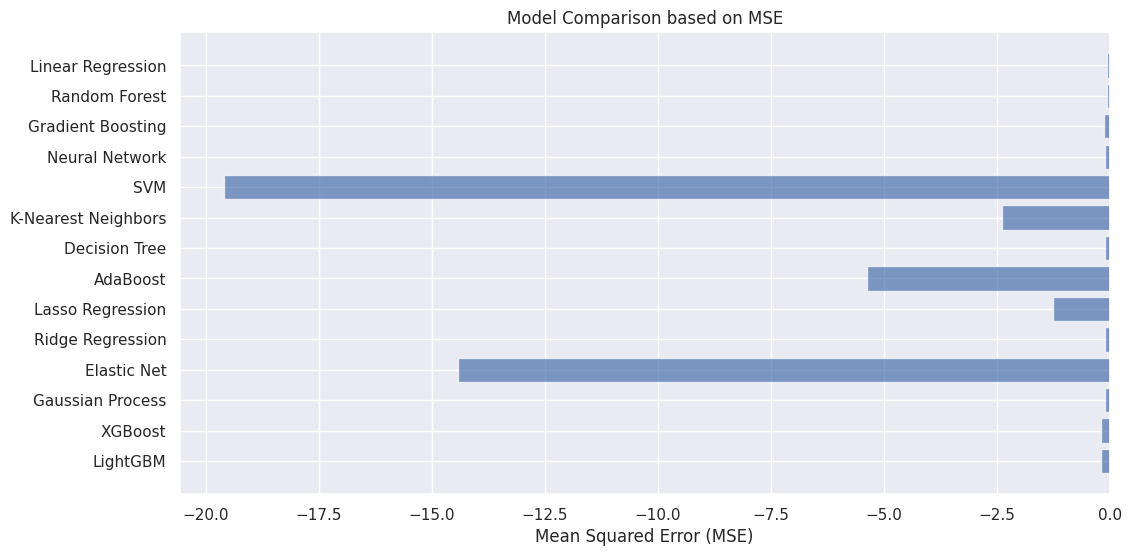

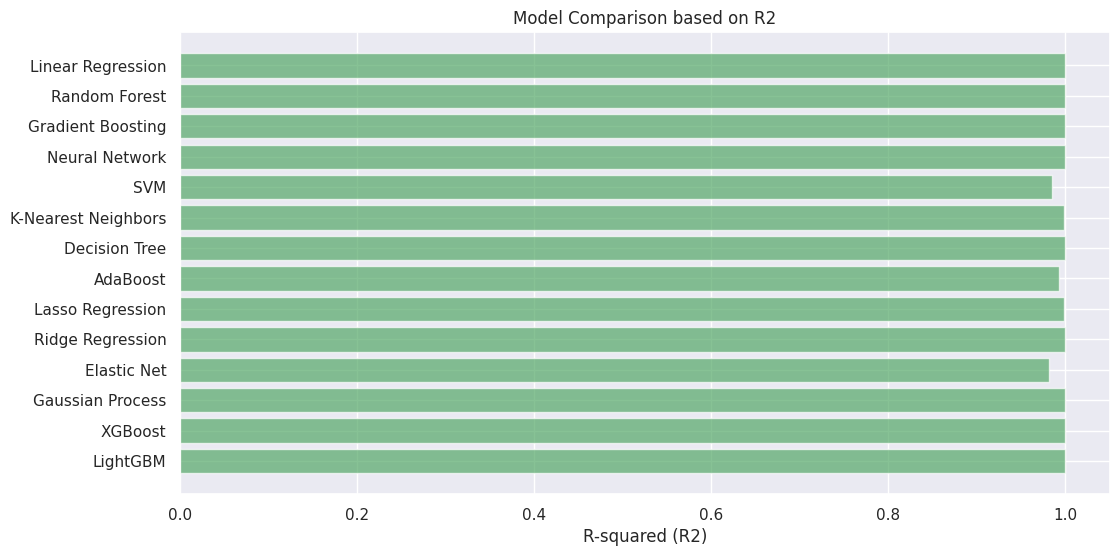

In [ ]:
names = ["Linear Regression", "Random Forest", "Gradient Boosting", "Neural Network",
         "SVM", "K-Nearest Neighbors", "Decision Tree", "AdaBoost",
         "Lasso Regression", "Ridge Regression", "Elastic Net", "Gaussian Process",
         "XGBoost", "LightGBM"]

mse_results = [cv_results.mean() for cv_results in results]
r2_results = [r2_score(y_train, model.fit(X_train, y_train).predict(X_train)) for name, model in models]

plt.figure(figsize=(12, 6))
plt.barh(names, mse_results, color='b', alpha=0.7)
plt.xlabel('Mean Squared Error (MSE)')
plt.title('Model Comparison based on MSE')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(names, r2_results, color='g', alpha=0.7)
plt.xlabel('R-squared (R2)')
plt.title('Model Comparison based on R2')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_train_pred = linear_model.predict(X_train)

mse = mean_squared_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)

print(f"Linear Regression Model:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r_squared}")

Linear Regression Model:
Mean Squared Error (MSE): 0.05505110974210851
R-squared (R2): 0.9999288954645413


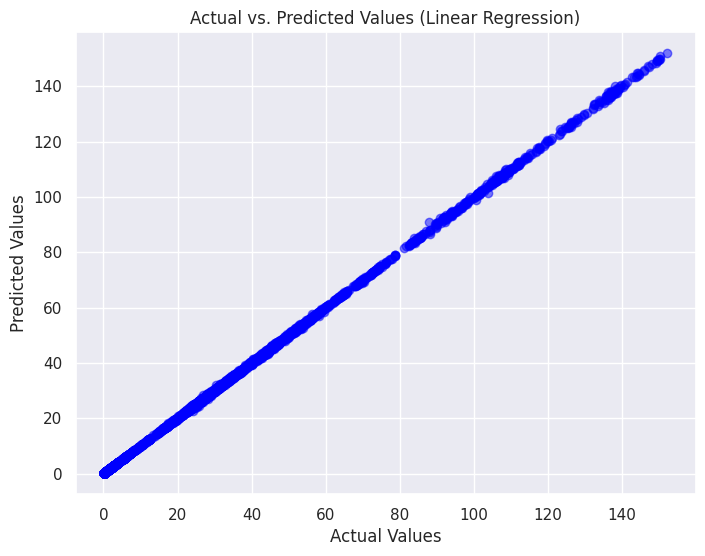

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.grid(True)
plt.show()

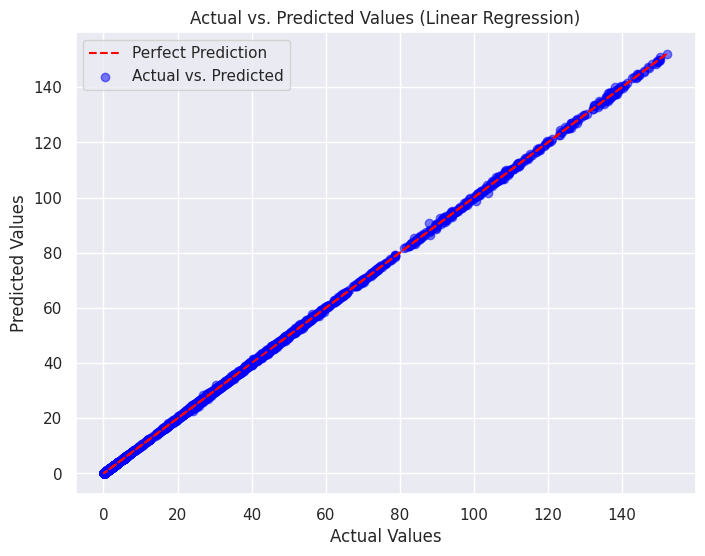

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(y_train, y_train, color='red', linestyle='--', label="Perfect Prediction")
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label="Actual vs. Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()